**Image Classification using CNN on CIFAR image dataset.**
We will use Image Generation to improve the accuracy.
We will also use Normalization layers and dropout layers to improve overfitting. i.e improving the regularization.

Run this using GPU since it has got a lot of data.


In [0]:
!pip install -q tensorflow-gpu==2.0


     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 24.3MB/s 
     |████████████████████████████████| 450kB 57.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


restart run time before executing the following code statement

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


Though pip command fails, when you restart and import tensorflow, it reflects 2.0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
!ls

sample_data


In [0]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
# 32 filters
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# 64 filters
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# 128 filters
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# classification
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# train with 50 loops. Hence  use GPUs.
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 353us/sample - loss: 1.3149 - accuracy: 0.5493 - val_loss: 1.1817 - val_accuracy: 0.5926
Epoch 2/30
50000/50000 [==============================] - 11s 211us/sample - loss: 0.8395 - accuracy: 0.7101 - val_loss: 0.7509 - val_accuracy: 0.7412
Epoch 3/30
50000/50000 [==============================] - 11s 212us/sample - loss: 0.6876 - accuracy: 0.7647 - val_loss: 0.7666 - val_accuracy: 0.7418
Epoch 4/30
50000/50000 [==============================] - 10s 210us/sample - loss: 0.5813 - accuracy: 0.7998 - val_loss: 0.6684 - val_accuracy: 0.7741
Epoch 5/30
50000/50000 [==============================] - 11s 217us/sample - loss: 0.4995 - accuracy: 0.8290 - val_loss: 0.6317 - val_accuracy: 0.7973
Epoch 6/30
50000/50000 [==============================] - 11s 211us/sample - loss: 0.4133 - accuracy: 0.8581 - val_loss: 0.7299 - val_accuracy: 0.7796
Epoch 7/30
50000/50000 [====================

**Visualize the losses**

Training along with Image Generation after first round of training using the existing data without any image generation.


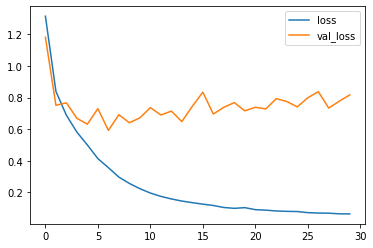

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

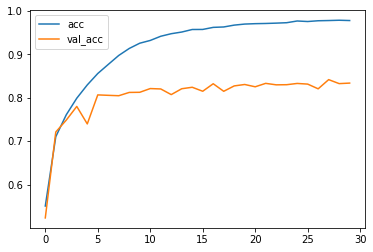

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(
    train_generator, 
    steps_per_epoch=steps_per_epoch, 
    validation_data=(x_test, y_test), 
    epochs=50)

Epoch 1/50
1562/1562 [==============================] - 95s 61ms/step - loss: 0.5559 - accuracy: 0.8206 - val_loss: 0.5225 - val_accuracy: 0.8307
Epoch 2/50
1562/1562 [==============================] - 96s 61ms/step - loss: 0.4496 - accuracy: 0.8516 - val_loss: 0.4825 - val_accuracy: 0.8428
Epoch 3/50
1562/1562 [==============================] - 96s 62ms/step - loss: 0.4142 - accuracy: 0.8606 - val_loss: 0.4805 - val_accuracy: 0.8428
Epoch 4/50
1562/1562 [==============================] - 96s 61ms/step - loss: 0.3962 - accuracy: 0.8656 - val_loss: 0.4653 - val_accuracy: 0.8468
Epoch 5/50
1562/1562 [==============================] - 96s 62ms/step - loss: 0.3720 - accuracy: 0.8741 - val_loss: 0.4338 - val_accuracy: 0.8572
Epoch 6/50
1562/1562 [==============================] - 97s 62ms/step - loss: 0.3567 - accuracy: 0.8790 - val_loss: 0.4855 - val_accuracy: 0.8459
Epoch 7/50
1562/1562 [==============================] - 98s 62ms/step - loss: 0.3451 - accuracy: 0.8841 - val_loss: 0.4391 -

**#After Image generation augmentation**

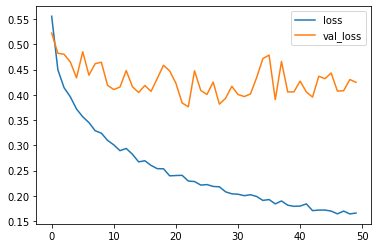

In [0]:
#After Image generation augmentation
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

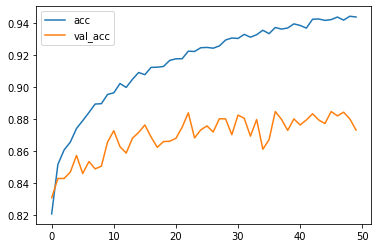

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[909  12  15  14   3   0   5   3  23  16]
 [  4 969   0   2   0   1   0   0   5  19]
 [ 44   1 787  38  32  20  58   6   6   8]
 [  8   3  26 786  27  54  60  12   8  16]
 [ 11   5  31  31 846  17  45  12   2   0]
 [  6   1  17 125  19 773  27  24   5   3]
 [  3   1  11  20   9   4 946   0   5   1]
 [ 10   4  12  20  24  16   6 902   1   5]
 [ 51  19   4   4   1   0   2   1 888  30]
 [ 10  55   0   4   1   0   1   1   3 925]]


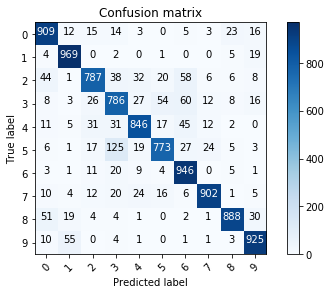

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

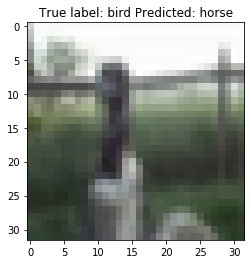

In [0]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

**Model Summary()**

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

Before Image Generation with multiple Pooling layers and Normization layers, 
we had : 97/84 for train/test accuracy
however, with the image generations, we got 
94/87 for train/test 
there is marginal improvement in test accuracy but there is a drop in training set.
The images are quite small. Hence the difference between one image to another low.
For example, airoplains and birds may look similar when the images are small.